<div style="background-color:#2E86C1; padding:15px; border-radius:10px">
    <h1 style="color:white; text-align:center;"> PROJET D'ANALYSE DE DONNEES </h1>
    <h2 style="color:white; text-align:center;"> Analyse discriminante de la pauvreté monétaire des ménages sénégalais en 2022 </h2>
</div>

<table style="width:100%;">
  <tr>
    <td style="text-align: left;">
      <img src="LOGO2.jpg" width="100px" alt="Image gauche">
    </td>
    <td style="text-align: right;">
      <img src="LOGO1.jpg" width="100px" alt="Image droite">
    </td>
  </tr>
</table>


<div style="background-color:#40E0D0; padding:15px; border-radius:10px">
    <table style="width: 100%; border-collapse: collapse; margin: 0 auto;">
        <tr>
            <th style="padding: 15px; background-color: #40E0D0; text-align: left; font-size:15px;">Rédigé par : </th>
            <th style="padding: 15px; background-color: #40E0D0; text-align: right;font-size:15px;">Sous la supervision de : </th>
        </tr>
        <tr>
            <td style="padding: 15px; background-color: #40E0D0; text-align: left;">
                <p style="color:black; font-size:15px;">     COULIBALY Khadidiatou</p>
                <p style="color:black; font-size:15px;">     DIENG Samba</p>
                <p style="color:black; font-size:15px;">     HABA Fromo Francis</p>
                <p style="color:black; font-size:15px;">     KAFANDO Judicaël Oscar</p>
                <p style="color:black; font-size:15px;">     NGUEMFOUO NGOUMTSA Célina</p>
                <p style="color:black; font-size:15px;font-style: italic;">     Elèves Ingénieurs Statisticiens économistes</p>
            </td>
            <td style=" padding: 15px; background-color: #40E0D0; text-align: right;font-size:15px;">Mme SARR Iphygénie
                <p></p>
                <p style="text-align: right;font-style: italic;">     Ingénieure Statisticienne économiste</p>
            </td>
        </tr>
    </table>
</div>

<div style="background-color:#87CEFB; padding:15px; border-radius:10px">
    <h5 style="color:black; text-align:center; font-size:20px;"> ISE 1 <br><br>Année académique 2024/2025 </h5>
</div>

<div style="background-color:#87CEFA; padding:15px; border-radius:10px">
    <h5 style="color:white; text-align:center; font-size:24px;"> Préliminaires </h5>
</div>

<h6 style="text-align:center; font-size:20px;"> Librairies </h6>

In [43]:
suppressMessages(suppressWarnings({
library(readxl)       # Permet d'importer les données
library(tidyverse)    # Permet de manipuler les matrices
library(FactoMineR)   # Permet de faire l'analyse factorielle
library(factoextra)   # Permet de les représentations de l'Analyse factorielle
library(gplots)       # Permet une représentation graphique du tableau de contingence
library(corrplot)
library(dplyr)
library(sampling)
library(kableExtra)
library(labelled)
library(klaR)
library(psych)
library(MASS)
library(devtools)
library(caret)
library(GGally)
}))

<h6 style="text-align:center; font-size:20px;"> Importation des données </h6>

In [20]:
Data_MCA <- haven::read_dta("Base_finale.dta") %>% to_factor()

In [22]:
niveau <- c()
noms <- c()

Variables <- names(Data_MCA) 

for (i in names(Data_MCA)) {

    
 label <- attr(Data_MCA[[i]], "label")
 noms <- c(noms, ifelse(!is.null(label), label, ""))

 niveau_var <-   attr(Data_MCA[[i]], "labels")
 niveau_var_str <- paste(niveau_var, names(niveau_var), collapse = " ; ")
 niveau <- c(niveau, niveau_var_str)            

}

tableau <- data.frame(
  Variable = Variables,
  description = noms,
 Valeurs = niveau,
  stringsAsFactors = FALSE
)

tableau

Variable,description,Valeurs
<chr>,<chr>,<chr>
hhid,,
zae,Zone agroecologique,
region,Region residence,
milieu,Milieu residence,
hhweight,Ponderation menage,
hhsize,Taille menage,
hgender,Genre du CM,
hage,Age du CM,
hmstat,Situation famille du CM,


In [23]:
head(Data_MCA[ , 1:11])

hhid,zae,region,milieu,hhweight,hhsize,hgender,hage,hmstat,heduc,hsectins
<chr>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>
13506,Thies-Diourbel-Louga,diourbel,Urbain,98.27486,8,Masculin,48,Marié(e) polygame,Supérieur,Entreprise Privée
12709,Thies-Diourbel-Louga,diourbel,Urbain,122.17886,4,Masculin,48,Marié(e) polygame,Aucun,Entreprise Privée
18411,Saint-Louis-Matam,SAINT-LOUIS,Rural,288.28547,5,Masculin,46,Marié(e) monogame,Primaire,Entreprise Privée
43512,Ziguinchor-Tamba-Kolda-Sédhiou,kolda,Rural,243.69882,4,Masculin,42,Marié(e) monogame,Aucun,Entreprise Privée
59802,Ziguinchor-Tamba-Kolda-Sédhiou,sedhiou,Rural,225.46186,4,Féminin,58,Veuf(ve),Aucun,NA
54001,Kédougou,kedougou,Urbain,24.66065,12,Féminin,75,Veuf(ve),Aucun,Entreprise Privée


In [24]:
Data_MCA  <- Data_MCA %>% 
remove_rownames %>% 
column_to_rownames(var="hhid")

In [25]:
dim(Data_MCA)

[1] 7038   29

<div style="background-color:#87CEFA; padding:15px; border-radius:10px">
    <h5 style="color:white; text-align:center; font-size:24px;"> ACM sur les variables qualitatives </h5>
</div>

<h6 style="text-align:center; font-size:20px;"> Choix des variables : Dimension </h6>

In [26]:
colnames(Data_MCA)

[1] "zae"                     "region"                 
 [3] "milieu"                  "hhweight"               
 [5] "hhsize"                  "hgender"                
 [7] "hage"                    "hmstat"                 
 [9] "heduc"                   "hsectins"               
[11] "hcsp"                    "poor"                   
[13] "nb_equip"                "dep_parfum"             
[15] "dep_chaus"               "assurance_maladie"      
[17] "insecu_alimentaire"      "type_logement"          
[19] "materiau_murs_ext"       "mateariau_sol"          
[21] "source_eau_saison_seche" "source_eclairage"       
[23] "reseau_tel_mobile"       "connecte_a_internet"    
[25] "hsecteur"                "nb_etab_fin"            
[27] "use_bois_ramasse"        "use_charbon_bois"       
[29] "prise_charge_medicale"

In [27]:
# Sélection des variables qui nous interessent concernant notre dimension

Data_MCA_var_quali <- Data_MCA  %>%  dplyr::select(.,hgender, hmstat, milieu, hsecteur )

poid <- Data_MCA$hhweight

<h6 style="text-align:center; font-size:20px;"> ACM </h6>

In [28]:
MCA_result <- MCA(Data_MCA_var_quali, ncp=5, graph = FALSE)

<p style="text-align:center; font-size:20px; font-style: italic;"> Analyse des valeurs propres </p>

In [29]:
eig.value <- MCA_result$eig
eig.value = as.data.frame(eig.value)
eig.value$dimension = seq.int(from=1, to=11, by=1)

#print(eig.value)

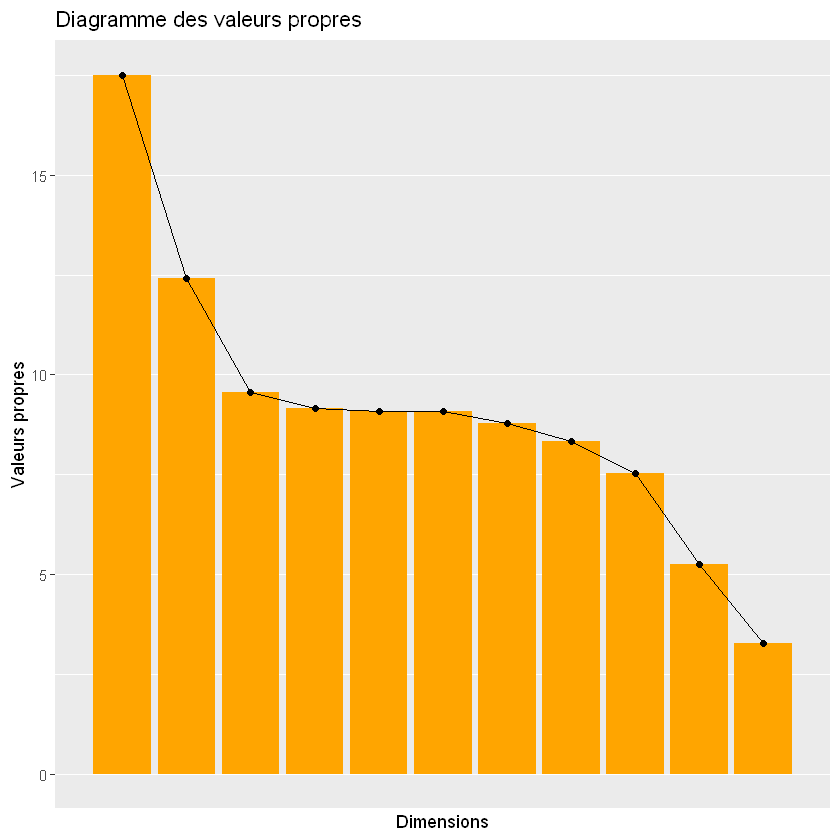

In [30]:
ggplot(eig.value, aes(x=dimension, y=`percentage of variance`)) +
  geom_bar(fill="#FFA500",stat = "identity") +
  geom_point() +
  geom_line() + 
  scale_x_discrete(breaks=seq.int(from=1, to=10, by=1)) +
  ggtitle("Diagramme des valeurs propres") +
  xlab("Dimensions") +
  ylab("Valeurs propres")

<p style="text-align:center; font-size:20px; font-style: italic;"> Analyse du nuage de variable </p>

<p style="font-size:20px; font-style: italic;"> Nuage des modalités </p>

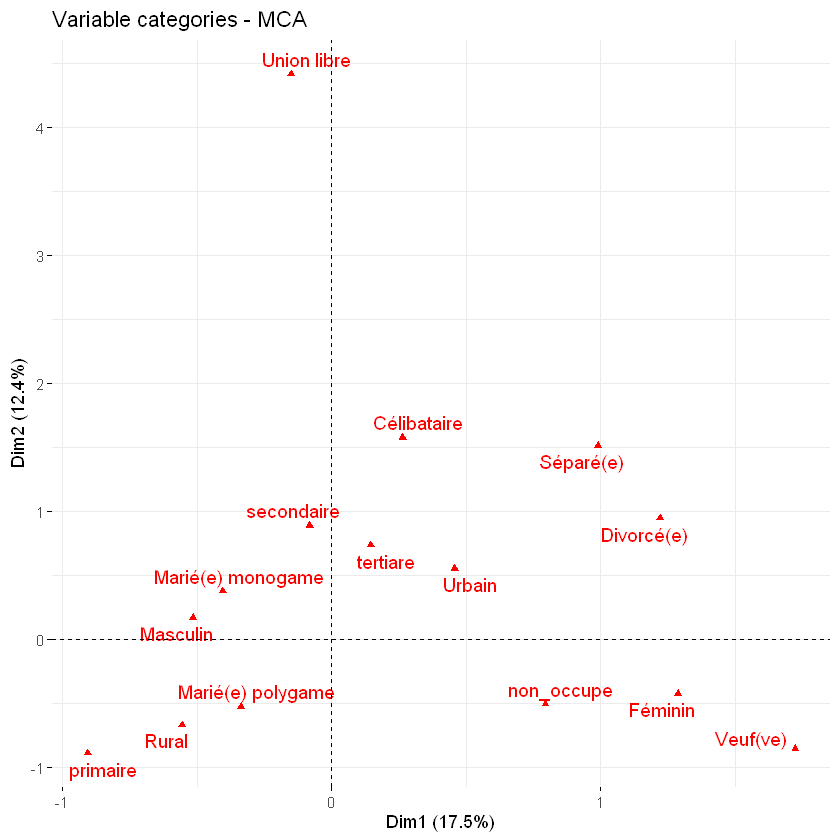

In [31]:
var <- get_mca_var(MCA_result)

# Nuage des modalités
fviz_mca_var(MCA_result,repel = TRUE, axes = c(1, 2))

<p style="font-size:20px; font-style: italic;"> Contribution des modalités à la formation des axes </p>

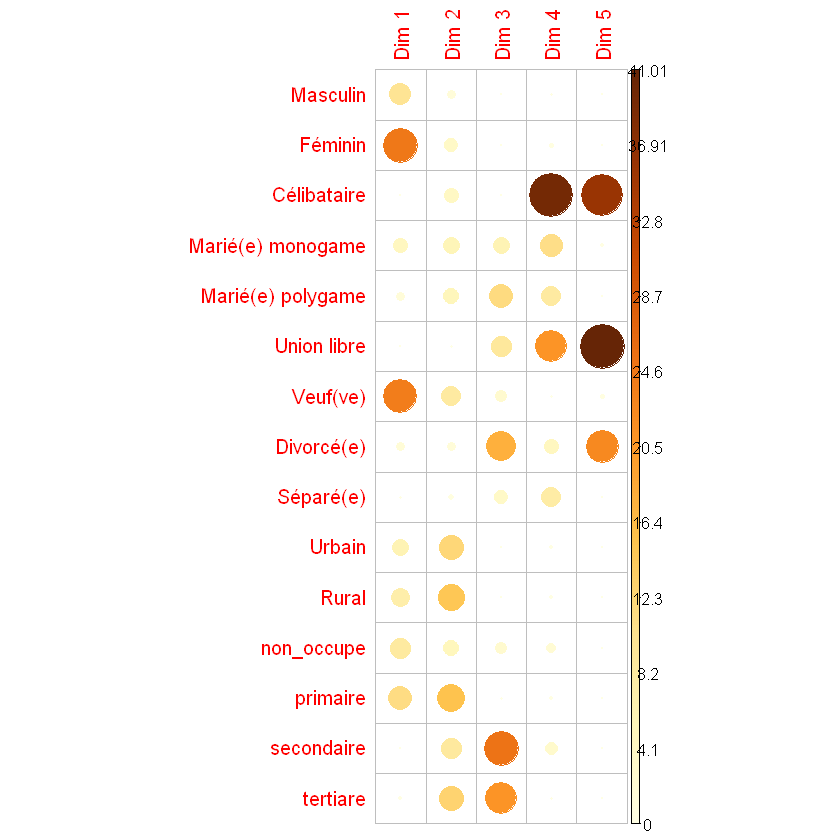

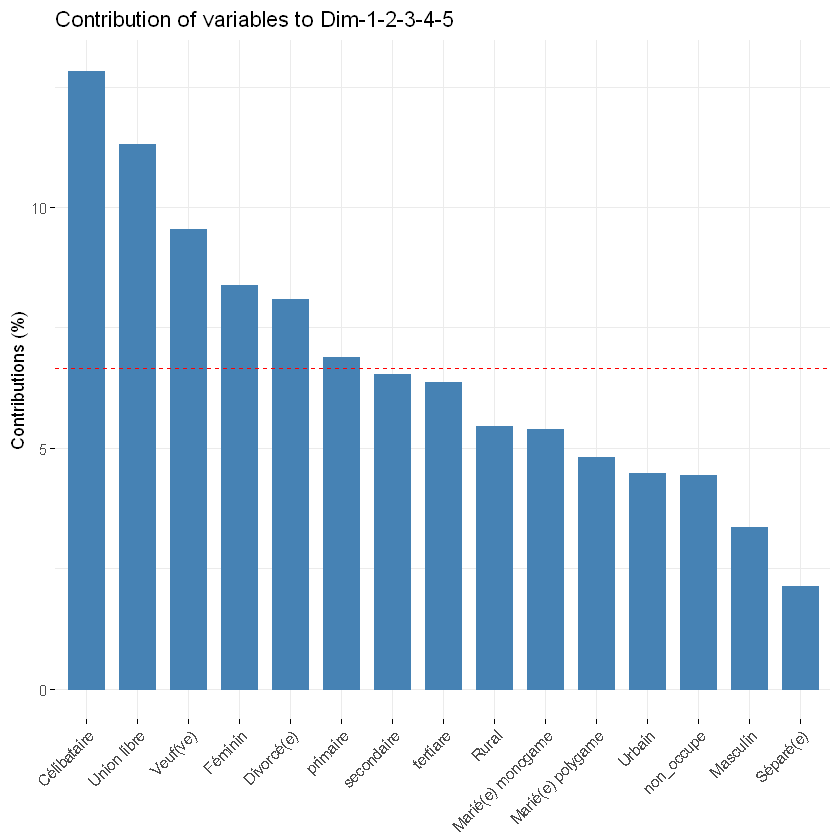

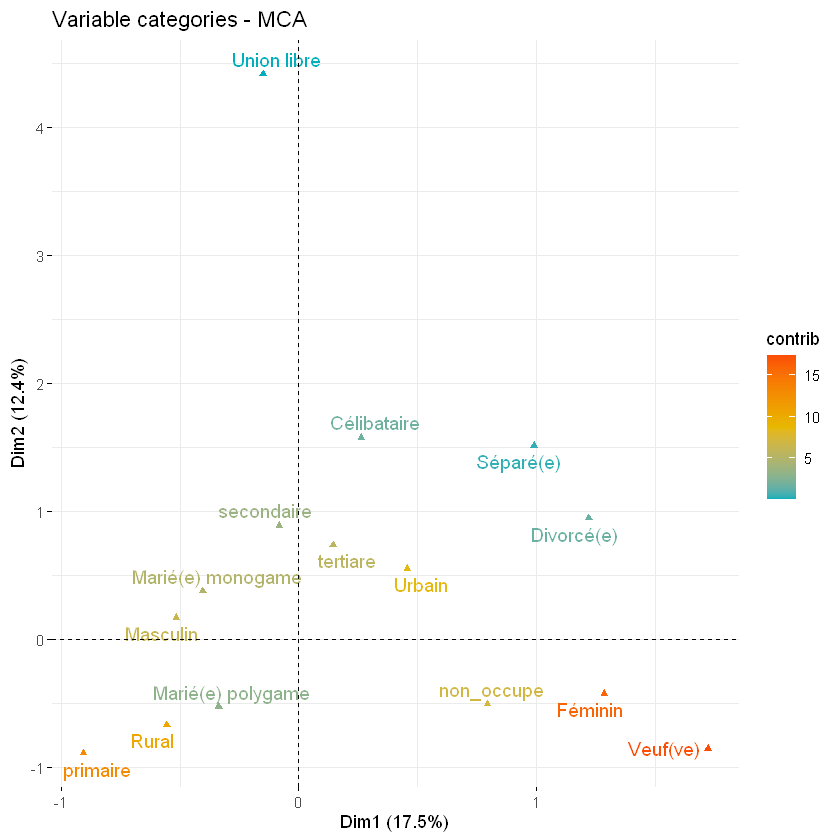

In [32]:
corrplot(var$contrib[,1:5], is.corr=FALSE)
fviz_contrib(MCA_result, choice = "var", axes = 1:5)
fviz_mca_var(MCA_result, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),repel = TRUE)

<p style="font-size:20px; font-style: italic;"> Qualité de representation des modalités </p>

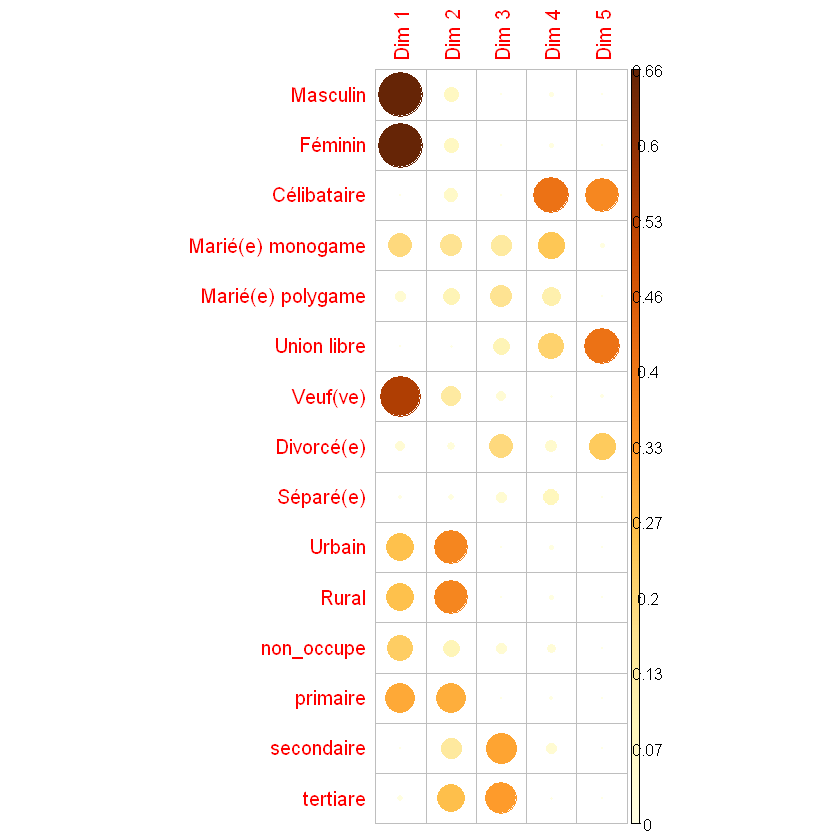

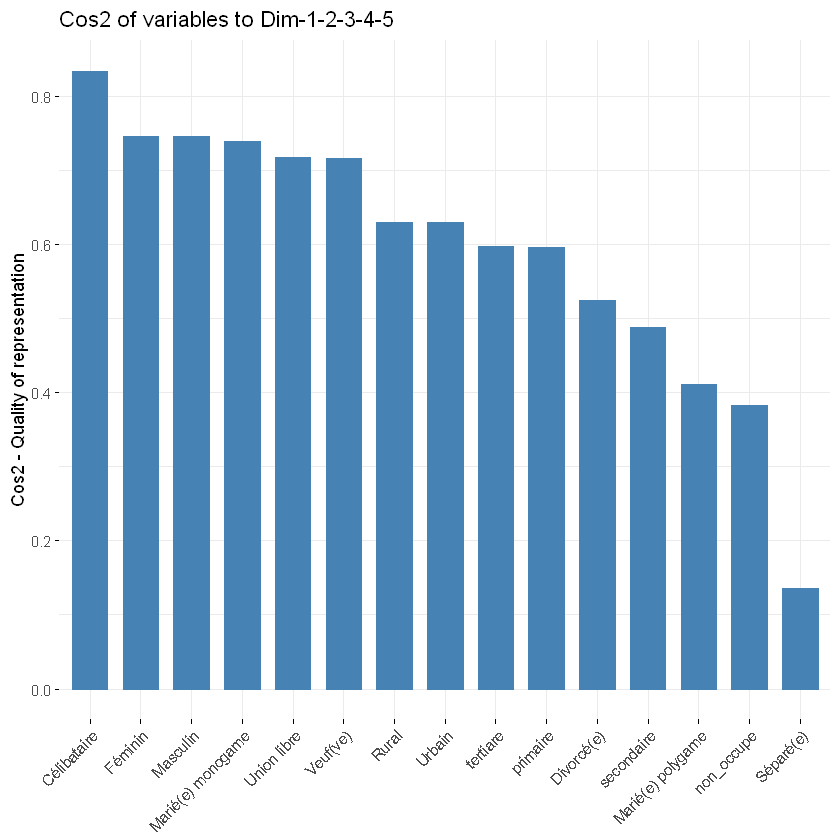

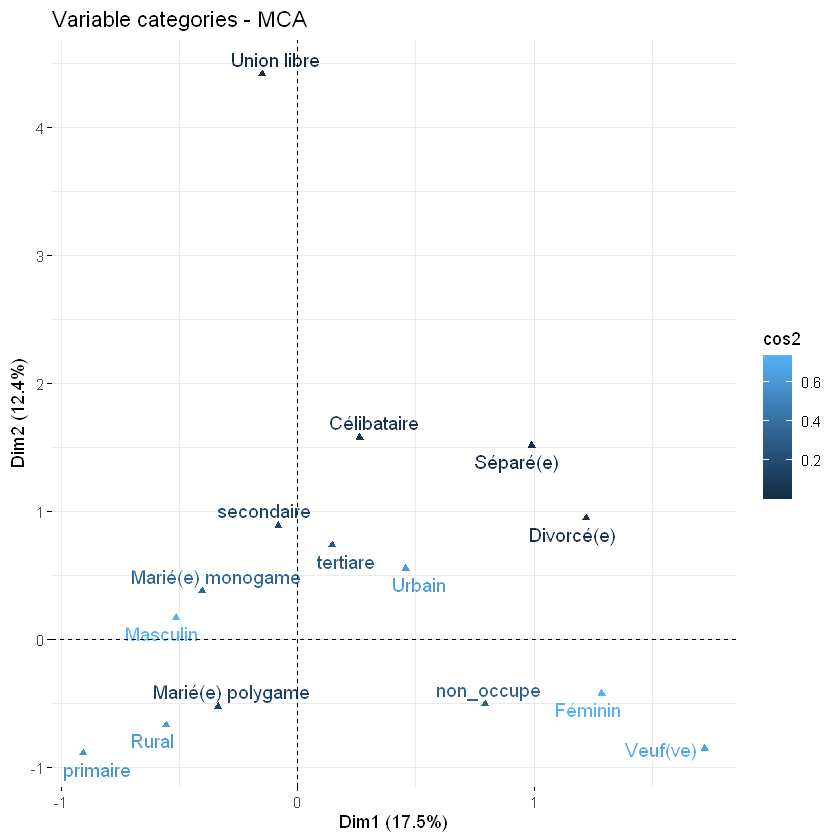

In [33]:
corrplot(var$cos2[,1:5], is.corr=FALSE)
fviz_cos2(MCA_result, choice = "var", axes = 1:5)
fviz_mca_var(MCA_result, col.var = "cos2", gradient.rows = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE)

<h6 style="text-align:center; font-size:20px;"> Interprétation </h6>

---

Le **premier axe** de l’ACM, que nous nommons **« évolution du profil des chefs de ménage au Sénégal »**, oppose deux groupes : d’une part, un profil plutôt *traditionnel* des chefs de ménages, caractérisé par des hommes en couple, vivant en zone rurale et exerçant dans le secteur primaire ou secondaire (valeurs négatives) ; et d’autre part, un profil plus *moderne* des chefs de ménages, représenté par des femmes non en couple, résidant en milieu urbain et actives dans le tertiaire ou sans emploi (valeurs positives). Cet axe rend compte de **17,5 %** de l’inertie totale du nuage.

Le **deuxième axe**, qui explique **12,4 %** de l’inertie, distingue principalement les chefs de ménages de sece féminin, vivant en milieu rurale, actives dans le secteur primaire ou inoccupées, des chefs de ménages de sexe masculin vivant en milieu urbain et exerçant dans le sectaire secondaire ou tertiaire. La variable « statut matrimonial » n’a pas été retenue dans la lecture de ce second axe en raison de sa faible contribution dans la construction de ce dernier.

<div style="background-color:#87CEFA; padding:15px; border-radius:10px">
    <h5 style="color:white; text-align:center; font-size:24px;"> AFD </h5>
</div>

<h6 style="text-align:center; font-size:20px;"> Sélection des variables </h6>

In [34]:
Var_quanti_AFD <- Data_MCA %>% 
dplyr::select(hhsize, hage, nb_equip, nb_etab_fin, dep_parfum, dep_chaus, poor)

In [35]:
coord_ind <- MCA_result$ind$coord
selected_axes <- coord_ind[, c(1, 2)]
colnames(selected_axes) <- c("Axe1", "Axe2")

# Ajout à la base initiale
Var_quanti_AFD <- cbind(Var_quanti_AFD, selected_axes)

In [36]:
names(Var_quanti_AFD)

[1] "hhsize"      "hage"        "nb_equip"    "nb_etab_fin" "dep_parfum" 
[6] "dep_chaus"   "poor"        "Axe1"        "Axe2"

<h6 style="text-align:center; font-size:20px;"> Choix de l'échantillon </h6>

In [44]:
Var_quanti_AFD[is.na(Var_quanti_AFD)] <- 0

In [45]:
set.seed(0)
  samples <- sample(2, nrow(Var_quanti_AFD),
                replace = TRUE,
                prob = c(0.8, 0.2))
  training <- Var_quanti_AFD[samples==1,]
  testing <- Var_quanti_AFD[samples==2,]

<h6 style="text-align:center; font-size:20px;"> Analyse discriminate </h6>

In [46]:
data_lda <- lda(poor~., training)

<p style="text-align:center; font-size:20px; font-style: italic;"> Probabilités à priori du groupe </p>

In [48]:
# Proportions des pauvres et non pauvres dans l'ensemble "d'entraînement"training". 
data_lda[["prior"]]

Non_pauvre     Pauvre 
 0.6696637  0.3303363

Il y a **33,03 %** de ménages pauvres et **66,97 %** de ménages non pauvres dans l’échantillon d’entraînement.

In [49]:
# Valeurs moyennes de chaque variable pour chaque catégorie.
data_lda[["means"]]

,hhsize,hage,nb_equip,nb_etab_fin,dep_parfum,dep_chaus,Axe1,Axe2
Non_pauvre,7.375134,54.39689,8.636144,1.1023093,5037.433,16545.80,0.1198807,0.1035684
Pauvre,11.512793,53.47741,5.397387,0.7920523,1849.036,11284.99,-0.2553324,-0.1929719


Les ménages **pauvres** se caractérisent par une taille moyenne élevée (11,5 membres), peu de types d’équipements (5,4 types en moyenne), des dépenses modestes (environ 1850 F en parfum et 11 285 F en chaussures en moyenne), un chef de ménage âgé en moyenne de 53,5 ans, faiblement bancarisé (ayant souscris à 0,8 établissements financiers en moyenne). Leurs scores négatifs aux axes ACM suggèrent des chefs de ménage en couple, vivant en milieu rural, et actifs dans le secteur primaire ou secondaire, ou inactifs. 

À l’inverse, les ménages **non pauvres** sont plus petits (7,4 membres), mieux équipés (8,6 types d’équipements), ont des chefs de ménages plus bancarisés (1,1 établissements), et ont des dépenses plus élevées (5037 F en parfum, 16 545 F en chaussures). Leurs scores positifs au axes de l'ACM indiquent des chefs souvent urbains, non en couple, et exerçant dans le secteur secondaire, tertiaire ou étant inactifs.

<p style="text-align:center; font-size:20px; font-style: italic;"> Coefficients discriminants linéaires </p>

In [50]:
# Combinaison linéaire des variables prédictives utilisée pour former la règle de décision de l'AFD.
data_lda[["scaling"]]

,LD1
hhsize,1.614546e-01
hage,-6.246790e-03
nb_equip,-1.717587e-01
nb_etab_fin,-1.227905e-01
dep_parfum,-3.142386e-05
dep_chaus,-1.140949e-05
Axe1,-2.800288e-01
Axe2,-2.286866e-01


En fonction de leur pouvoir **discriminant**, les variables les plus importantes sont d’abord celles issues de l’ACM (l’axe 1, puis l’axe 2), suivies du nombre de types d’équipements possédés, de la taille du ménage, et du nombre d’établissements financiers auxquels le chef de ménage a souscrit.

<p style="text-align:center; font-size:20px; font-style: italic;"> Coordonnées discriminantes ou score des individus </p>

In [51]:
# Extraire les coefficients de l'axe LD1 depuis le modèle lda
coefs <- as.numeric(data_lda$scaling[, 1])  # colonne LD1
vars  <- rownames(data_lda$scaling)         # noms des variables

# Vérification : les variables doivent être dans le training
vars <- vars[vars %in% names(training)]
coefs <- coefs[vars %in% names(training)]

# Calcul du score LD1 pour chaque individu
training$LD1 <- as.matrix(training[, vars]) %*% coefs

In [52]:
scores <- predict(data_lda, training)$x[,1]   # colonne LD1
aggregate(scores ~ training$poor, FUN = mean)

training$poor,scores
<fct>,<dbl>
Non_pauvre,-0.5289574
Pauvre,1.0723120


Le score des individus pauvres est positif, et celui des individus non pauvres est positifs. Dons plus le score est élévé, plus un individu est pauvre.

En outre, les coefficients linéaires trouvés pour chaque variable permettent de conclure qu'une taille de ménage élévé, un nombre d'équipements faible, peu de souscriptions financières aux étblissments financiers pour le chef de ménage et des valeurs négatives aux variables de l'ACM — indiquant un chef de ménage en couple, rural et exerçant dans le secteur primaire, secondaire ou sans emploi — caractérisent un ménage pauvre.

<p style="text-align:center; font-size:20px; font-style: italic;"> Quelques representations graphiques </p>

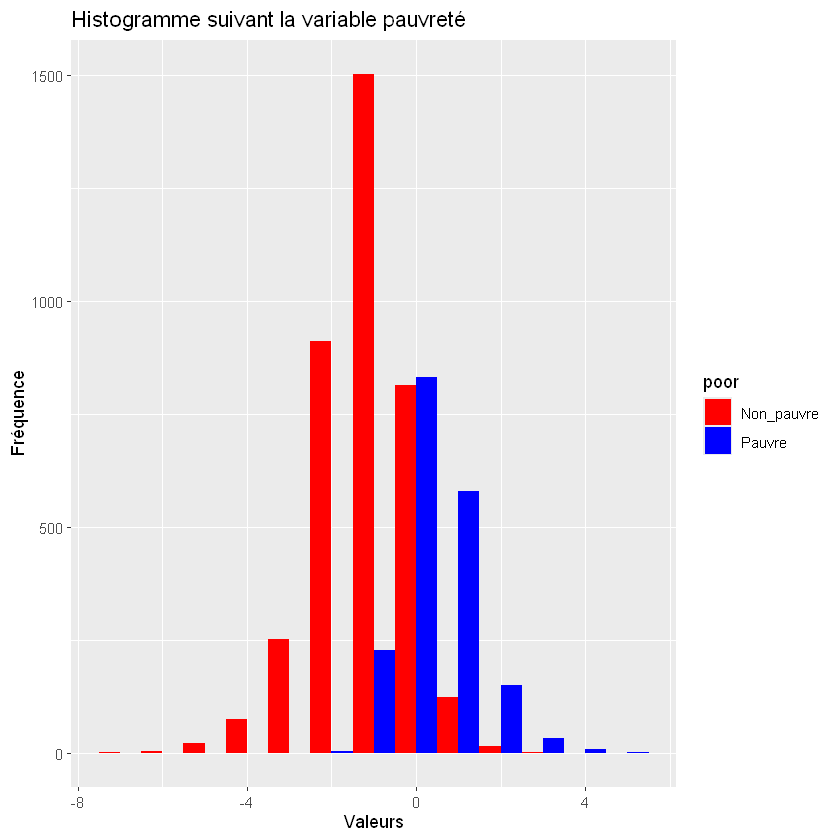

In [60]:
ggplot(training, aes(x = LD1, fill = poor)) +
        geom_histogram(binwidth = 1, position = "dodge") +
        labs(title = "Histogramme suivant la variable pauvreté", x = "Valeurs", y = "Fréquence") +
        scale_fill_manual(values = c("red", "blue", "green"))

Cet histogramme des scores LD1 (combinaison des variables discriminantes) selon le statut de pauvreté montre que les non pauvres se concentrent sur des valeurs négatives proches de zéro, tandis que les pauvres sont plutôt situés autour de scores faibles et positifs (rejoignant le résultat précédent). De plus, bien que les distributions se chevauchent partiellement, la séparation reste visible, ce qui indique que le score LD1 parvient à distinguer en partie les deux groupes.

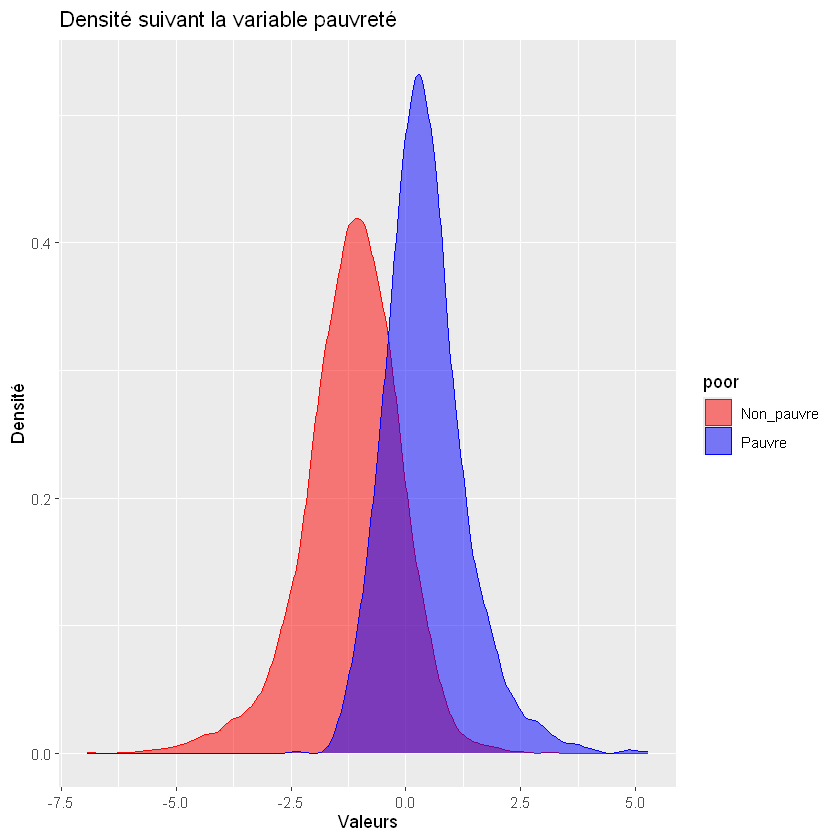

In [61]:
ggplot(training, aes(x = LD1, color = poor, fill = poor)) +
        geom_density(alpha = 0.5) +
        labs(title = "Densité suivant la variable pauvreté", x = "Valeurs", y = "Densité") +
        scale_color_manual(values = c("red", "blue", "green")) +
        scale_fill_manual(values = c("red", "blue", "green"))

Ce graphique présente les courbes de densité des scores LD1 selon le statut de pauvreté. Les non pauvres sont concentrés autour de valeurs négatives (entre -1 et -0,5), tandis que les pauvres se situent plutôt entre 0 et 1. Bien que les courbes se chevauchent partiellement, elles restent distinctes, illustrant une bonne capacité du modèle à différencier les deux groupes.

<h6 style="text-align:center; font-size:20px;"> Prédiction à partir de l'échantillon test </h6>

In [56]:
predicted <- predict(data_lda,testing)

In [57]:
# Cette fonction renvoie une liste avec trois variables.
      # class : La catégorie prédite (ou le diagnostique)
      # posterior : La probabilité a posteriori qu'une observation appartienne à chaque classe
      # x : Les scores des individus sur lesquels le test est fait
      classement <- data.frame(predicted$class)
      score <- predicted$x
      affectation <- cbind(testing, score, classement)

<p style="text-align:center; font-size:20px; font-style: italic;"> Matrice de confusion et qualité de l'affection </p>

In [58]:
vect <- predict(data_lda, testing)$class
quality <- table(Actual = testing$poor, Predicted = vect)
print(quality)

            Predicted
Actual       Non_pauvre Pauvre
  Non_pauvre        863    113
  Pauvre            179    322


Sur les **976 ménages réellement non pauvres**, **<span style="color: green;">863</span>** ont été correctement prédits, et **<span style="color: red;"> 113</span>** ont été classés à tort comme pauvres. 

Parmi les **501 ménages réellement pauvres**, **<span style="color: green;">332</span>** ont été bien identifiés, tandis que **<span style="color: red;"> 179</span>** ont été mal classés.

<p style="text-align:center; font-size:20px; font-style: italic;"> Pourcentage de prédictibilité </p>

In [59]:
sum(diag(quality))/sum(quality)*100

[1] 80.2302

Le taux de prédiction correcte (ou *taux de précision globale*) est d’environ **80,23 %**, révélant une assez bonne capacité de discrimination du modèle.

<h6 style="text-align:center; font-size:20px;"> Interprétation </h6>

---

Avec une précision de **80,23 %**, l’*Analyse Factorielle Discriminante* réalisée permet d’identifier les ménages pauvres au Sénégal en 2022 comme étant en moyenne plus nombreux, moins équipés, dirigés par un chef de ménage vivant en couple, peu inséré dans le système financier, résidant en zone rurale et exerçant dans le secteur primaire, secondaire ou étant sans emploi.